In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import CWScheduler
import scipy.constants as C
import unittest
import numpy as np
from odmactor.utils.plotting import plot_freq_contrast
import time


In [30]:

t_ns = 1e5
N = int(1e5 / 4)


freq_start = 2.83 * C.giga
freq_end = 2.94 * C.giga
freq_step = 1 * C.mega
p = 10
# 通道、微波、序列、counter
scheduler = CWScheduler()
scheduler.configure_mw_paras(p)
scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_odmr_seq(t_ns, N)
scheduler.configure_tagger_counting()

scheduler.run_scanning('on')
# res_on = scheduler.result  # [freqs, counts]
#
# scheduler.run_scanning('off')
# res_off = scheduler.result
scheduler.close()
# contrasts = [abs(c_off - c_on) / c_on for c_on, c_off in zip(res_on[1], res_off[1])]


 USE ASGDLL_x64.dll 
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run CW ODMR Scheduler. Frequency: 2.8300 - 2.9400 GHz.
t: 100000.00 ns, N: 25000, T: 2.50 s, n_freqs: 111
Estimated total running time: 277.50 s
MW on/off status: True
CW _acquire_data_with_ref
scanning freq 2.8300 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8310 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8320 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8330 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8340 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8350 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8360 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8370 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8380 GHz
MW on/off status: True
MW on/off status: True
scanning freq 2.8390 GHz
MW on/off status: True
MW on/off status: True
scanning freq 

In [31]:
res_on_off = scheduler.result
res = scheduler.res

plt.style.use('seaborn')

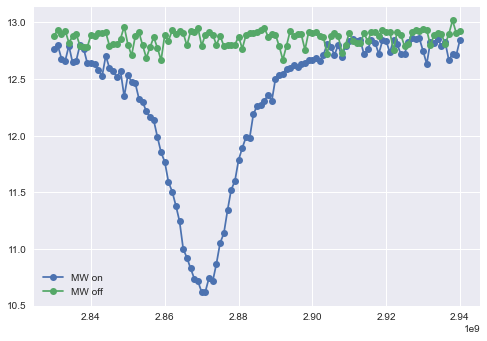

In [32]:
plt.plot(res_on_off[0], res_on_off[1],'o-',label='MW on')
plt.plot(res_on_off[0], res_on_off[2], 'o-', label='MW off')
plt.legend()
plt.show()


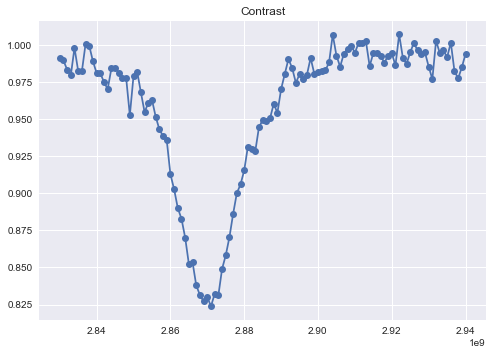

In [33]:
plt.plot(res_on_off[0], res, 'o-')
plt.title('Contrast')
plt.show()

In [34]:
np.savetxt('cw-counting-4-10dbm.txt', np.array(res_on_off))
np.savetxt('cw-contrast-4-10dbm.txt',np.vstack([res_on_off[0], res]).T)

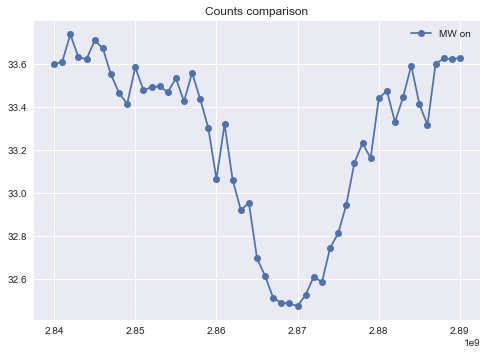

In [23]:
plt.figure()
plt.plot(*res_on, 'o-',  label='MW on')
# plt.plot(*res_off, label='MW off')
plt.legend()
plt.title('Counts comparison')
# plt.savefig('counts_on_off (CW)', dpi=400)
plt.show()


In [ ]:
plot_freq_contrast(res_on[0], contrasts, fname='contrasts-CW')
plt.show()

In [ ]:
print('Average counting:')
print('MW on:')
print(np.round(res_on, 2))
print('MW off:')
print(np.round(res_off, 2))
print('Contrast:')
print(np.round(contrasts))
#

np.savetxt('counts-cw-new.txt', res_on + res_off)
np.savetxt('contrast-cw-new.txt', np.vstack([scheduler._freqs, contrasts]))